# 1. Naive Bayes

For this problem, first you have create a user-defined fuction for Bernoulli naive Bayes. Then, train a classifier using this function.

For this problem, use the MAGIC Gamma Telescope data set.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trainX,testX,trainY,testY=train_test_split(X,y,stratify=y,test_size=0.2,random_state=11)

In [5]:
X

array([[ 28.7967,  16.0021,   2.6449, ...,  -8.2027,  40.092 ,  81.8828],
       [ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [162.052 , 136.031 ,   4.0612, ..., -45.216 ,  76.96  , 256.788 ],
       ...,
       [ 75.4455,  47.5305,   3.4483, ...,  -9.4662,  30.2987, 256.5166],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166],
       [187.1814,  53.0014,   3.2093, ...,  31.4755,  52.731 , 272.3174]])

(1) Complete the following user-defined function for Bernoulli naive Bayes. 

In [23]:
def BNB(X,y,alpha=1):
    ######## BERNOULLI NAIVE BAYES ########
    # INPUT 
    # X: n by p array (n=# of observations, p=# of input variables)
    # y: output (len(y)=n, categorical variable)
    # alpha: smoothing paramater
    # OUTPUT
    # pmatrix: 2-D array(list) of size c by p with the probability p_ij=P(x_j=1|y_j=i) (i=class, j=feature) 
    #         where c is number of unique classes in y
        
    # TODO: Bernoulli NB
    
    n, p = X.shape
    eleY = np.unique(y)
    c = len(eleY)
    
    avg = []
    for i in range(p):
        avg.append(np.mean(X[:, i]))
    
    countX = np.zeros((c, p)) # for N(x = 1 | y = 'g'), N(x = 1 | y = 'h') == N_tic
    
    for i in range(n):
        for j in range(p):
            if X[i, j] > avg[j]:
                if y[i] == 'g':
                    countX[0, j] += 1
                else:
                    countX[1, j] += 1

    probX = np.zeros((c, p)) # P(x = 1 | y = 'g'), P(x = 1 | y = 'h')


    binaryY = np.zeros((1, p)) # array(1, p) which contains 0 or 1 for BNB based on Y
    countY = [0, 0] # For N('g'), N('h') == N_c
    probY = [0, 0] # array for containing probability for each columns based on Y: P(y_j = i)

    countY[0] = list(y).count('g')
    countY[1] = list(y).count('h')

    for i in range(c):
        for j in range(p):
            probX[i, j] = (countX[i, j] + alpha) / (countY[i] + (alpha * c))
            
    pmatrix = probX
    
    return pmatrix

(2) First, you have to binarize training set (trainX) of MAGIC Gamma Telescope data set. Each column is converted to binary variable based on the average value. If a value is greater than average, set a value as 1. Otherwise, set a value as 0. Then, using new binarized dataset, calculate $p_{ij}$ (i=class,j=feature) with alpha=1. 

In [24]:
avg = []
for i in range(trainX.shape[1]):
    avg.append(np.mean(trainX[:, i]))

binaryX = (trainX > trainX.mean(axis = 0)) ** 1

In [25]:
"""
ANSWER
"""
result = BNB(binaryX, trainY)
print(result)

[[0.28394812 0.26570734 0.40099311 0.44791244 0.43362383 0.66041751
  0.61076206 0.50405351 0.23510336 0.46068099]
 [0.46020179 0.39872945 0.47328102 0.46319133 0.45347534 0.52709268
  0.50840807 0.49701046 0.67470105 0.53419283]]


In [26]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB(alpha = 1).fit(binaryX, trainY)
print(np.exp(model_bern.feature_log_prob_))

[[0.28394812 0.26570734 0.40099311 0.44791244 0.43362383 0.66041751
  0.61076206 0.50405351 0.23510336 0.46068099]
 [0.46020179 0.39872945 0.47328102 0.46319133 0.45347534 0.52709268
  0.50840807 0.49701046 0.67470105 0.53419283]]


(3) Based on the calculated p_ij, calculate probability of class g for each test sample (testX) and calculate accuracy for testX with varying cutoff (To binarize testX, use the mean of trainX). Prior probabilities of classes are proportional to ratios of classes in training set. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). 

In [27]:
prob_2 = result
# Probability of class g

n, p = testX.shape
binaryX = binaryX = (testX > trainX.mean(axis = 0)) ** 1
ptr = list(model_bern.predict_proba(binaryX)[:, 0])

avg = []
for i in range(p):
    avg.append(np.mean(trainX[:, i]))
        
prior_g = list(testY).count('g') / n # Prior P(y = 'g')

In [28]:
# Posterior probability
prob_g = [] # array of Posterior probability for each test sample: P(y = 'g' | x = 1) (testX)

for i in range(n): # likelihood: P(x = 1 | y = 'g'), P(x = 1 | y = 'h')
    temp = [1, 1]
    for j in range(p):
        if binaryX[i, j] == 1:
            temp[0] *= prob_2[0][j]
            temp[1] *= prob_2[1][j]
        else:
            temp[0] *= (1 - prob_2[0][j])
            temp[1] *= (1 - prob_2[1][j])
    # P(x = 1 | y = 'g') * P(y = 'g'), P(x = 1 | y = 'h') * P(y = 'h')
    temp[0] *= prior_g
    temp[1] *= (1 - prior_g)
    
    prob_g.append(list(temp / sum(temp)))

prob_g = np.array(prob_g)
prob_g = prob_g[:, 0]

In [29]:
print("P(x = 1 | y = 'g') based on BNB:")
print(prob_2, "\n")

print("P(x = 1 | y = 'g') based on sklearn:")
print(np.exp(model_bern.feature_log_prob_)[0])

P(x = 1 | y = 'g') based on BNB:
[[0.28394812 0.26570734 0.40099311 0.44791244 0.43362383 0.66041751
  0.61076206 0.50405351 0.23510336 0.46068099]
 [0.46020179 0.39872945 0.47328102 0.46319133 0.45347534 0.52709268
  0.50840807 0.49701046 0.67470105 0.53419283]] 

P(x = 1 | y = 'g') based on sklearn:
[0.28394812 0.26570734 0.40099311 0.44791244 0.43362383 0.66041751
 0.61076206 0.50405351 0.23510336 0.46068099]


In [30]:
print("BNB P(y = 'g' | x = 1): ", prob_g)
print("sklearn P(y = 'g' | x = 1): ", ptr)

BNB P(y = 'g' | x = 1):  [0.56033987 0.86164528 0.56033987 ... 0.40974611 0.14886927 0.51863427]
sklearn P(y = 'g' | x = 1):  [0.5604818913657064, 0.8617139866818905, 0.5604818913657064, 0.6732668962208065, 0.8617139866818905, 0.42900657015622784, 0.8274279895826151, 0.8503985017694972, 0.4755065425352354, 0.5903500439199807, 0.8652998149213517, 0.7399593739776774, 0.9269710932479277, 0.10606042326146406, 0.7541036539880825, 0.5759371877272168, 0.6242179173929846, 0.8274279895826151, 0.8617139866818905, 0.690026411578286, 0.4373428510207184, 0.9159666223542664, 0.41538856182053263, 0.3020209493142023, 0.10341881923519594, 0.5604818913657064, 0.5484704210289498, 0.8441981313055112, 0.9084128828705499, 0.8930567650285004, 0.554087027459063, 0.918092153944566, 0.42224593089384266, 0.8903361486911052, 0.4666485244274953, 0.8271659676697125, 0.8425464273499065, 0.45024441523055597, 0.804548779253746, 0.6569067864226369, 0.3588193865213995, 0.8560688249053253, 0.9269710932479277, 0.422245930

In [10]:
### Method for calculating accuracy by comparing two array

def score_calc(A, B):
    count = 0
    for i in range(len(B)):
        if A[i] == B[i]:
            count += 1
    return count / len(B)

In [11]:
### Calculating accuracy with varying cutoff: BNB

cutoff = np.arange(0.1, 1, 0.05) # array of cutoff
set_Y = [] # array of estimated y based on prob_g
for i in cutoff:
    cutoff_Y = ['g' if j >= i else 'h' for j in prob_g]
    set_Y.append(cutoff_Y)

acc_Y = [] # array of accuracy based on set_y and testY
for i in range(len(set_Y)):
    acc_Y.append(score_calc(set_Y[i], testY))


In [12]:

### Calculating accuracy with varying cutoff

set_Y_sklearn = []
for i in cutoff:
    cutoff_Y = ['g' if j >= i else 'h' for j in ptr]
    set_Y_sklearn.append(cutoff_Y)

### set_Y_sklearn & testY

acc_Y_sklearn_calc = []
for i in range(len(set_Y)):
    acc_Y_sklearn_calc.append(score_calc(set_Y_sklearn[i], testY))

In [13]:
acc_Y_sklearn = []
for i in set_Y:
    accuracy_Y = model_bern.score(binaryX, i)
    acc_Y_sklearn.append(accuracy_Y)

<function matplotlib.pyplot.show(*args, **kw)>

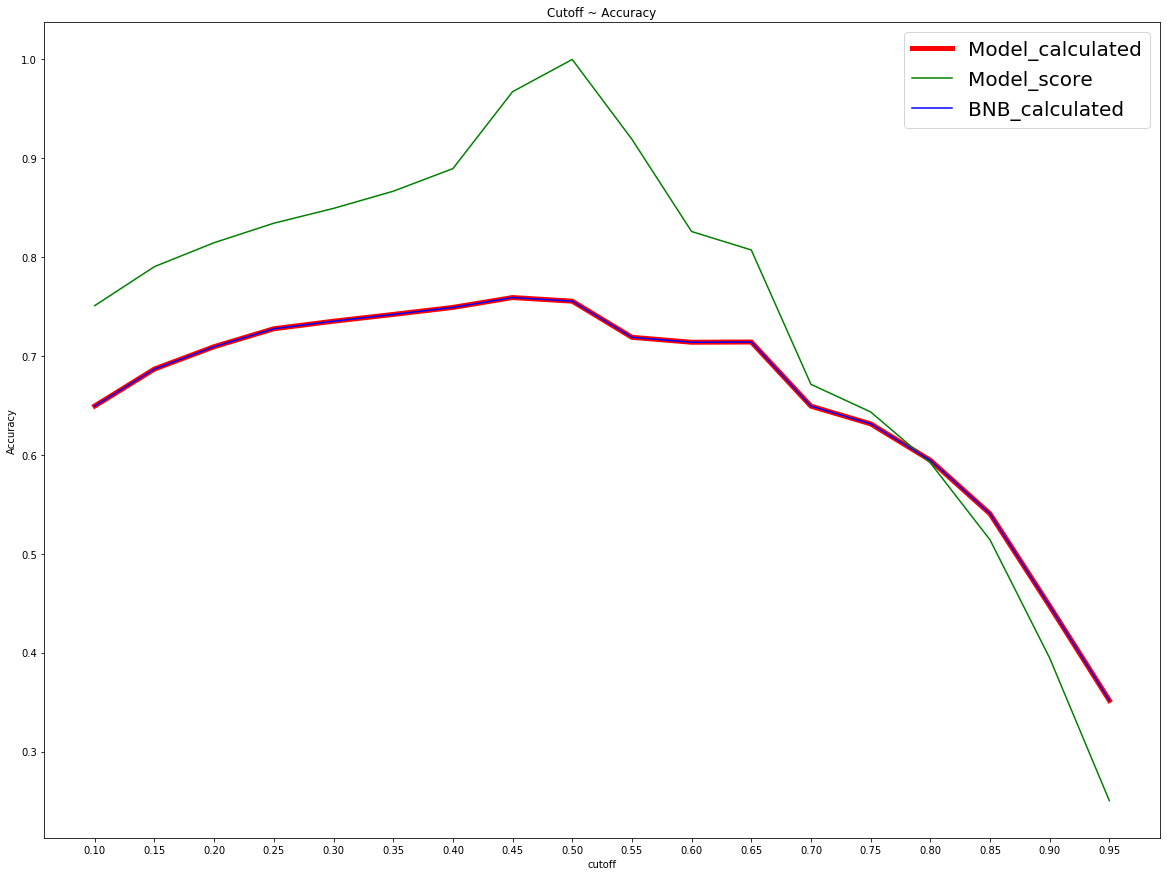

In [14]:
plt.figure(figsize = (20, 15))
plt.plot(cutoff, acc_Y_sklearn_calc, color = "red", label = "Model_calculated", linewidth=5.0)
plt.plot(cutoff, acc_Y_sklearn, color = "green", label = "Model_score")
plt.plot(cutoff, acc_Y, color = "blue", label = "BNB_calculated")
plt.title("Cutoff ~ Accuracy")
plt.xlabel("cutoff")
plt.ylabel("Accuracy")
plt.xticks(cutoff)
plt.legend(loc = 0, prop = {"size" : 20})
plt.show

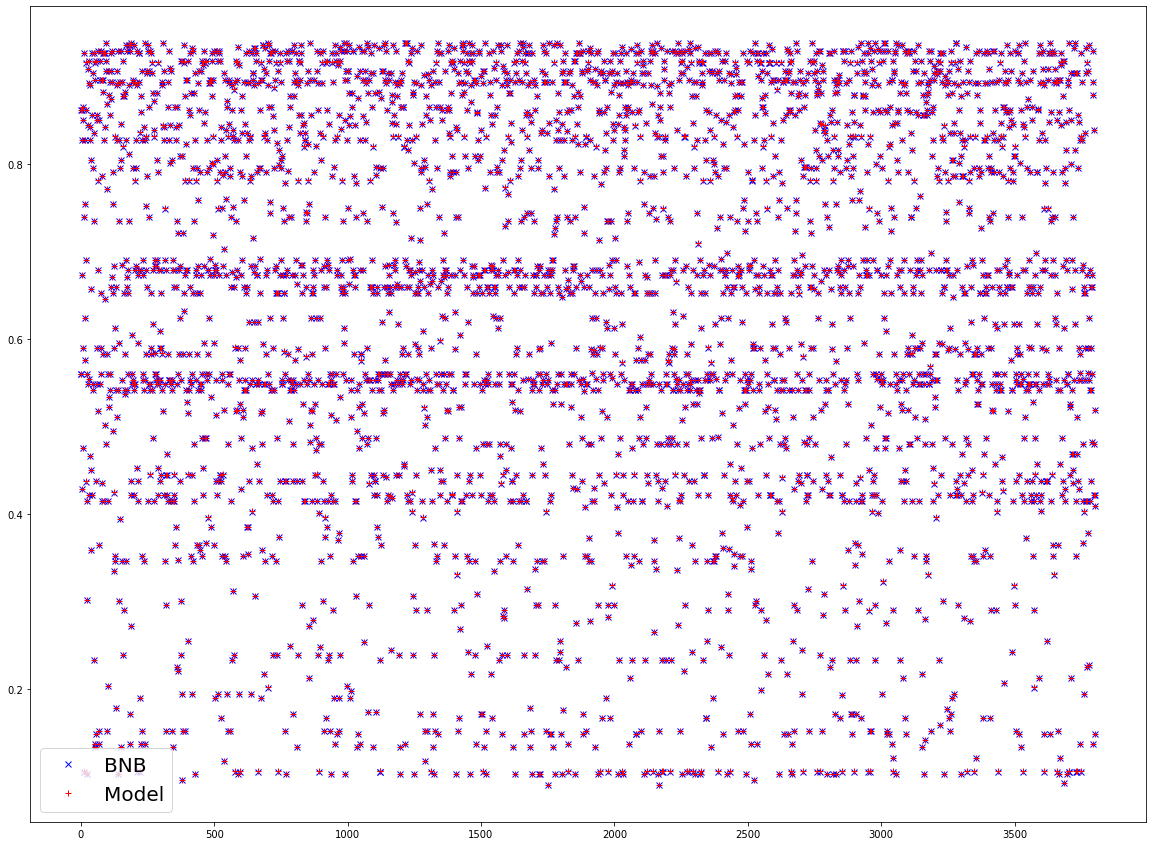

In [15]:
plt.figure(figsize = (20, 15))
plt.plot(prob_g, 'x', color = "blue", label = "BNB")
plt.plot(list(model_bern.predict_proba(binaryX)[:, 0]), '+', color = "red", label = "Model")
plt.legend(loc = 0, prop = {"size": 20})
plt.show()

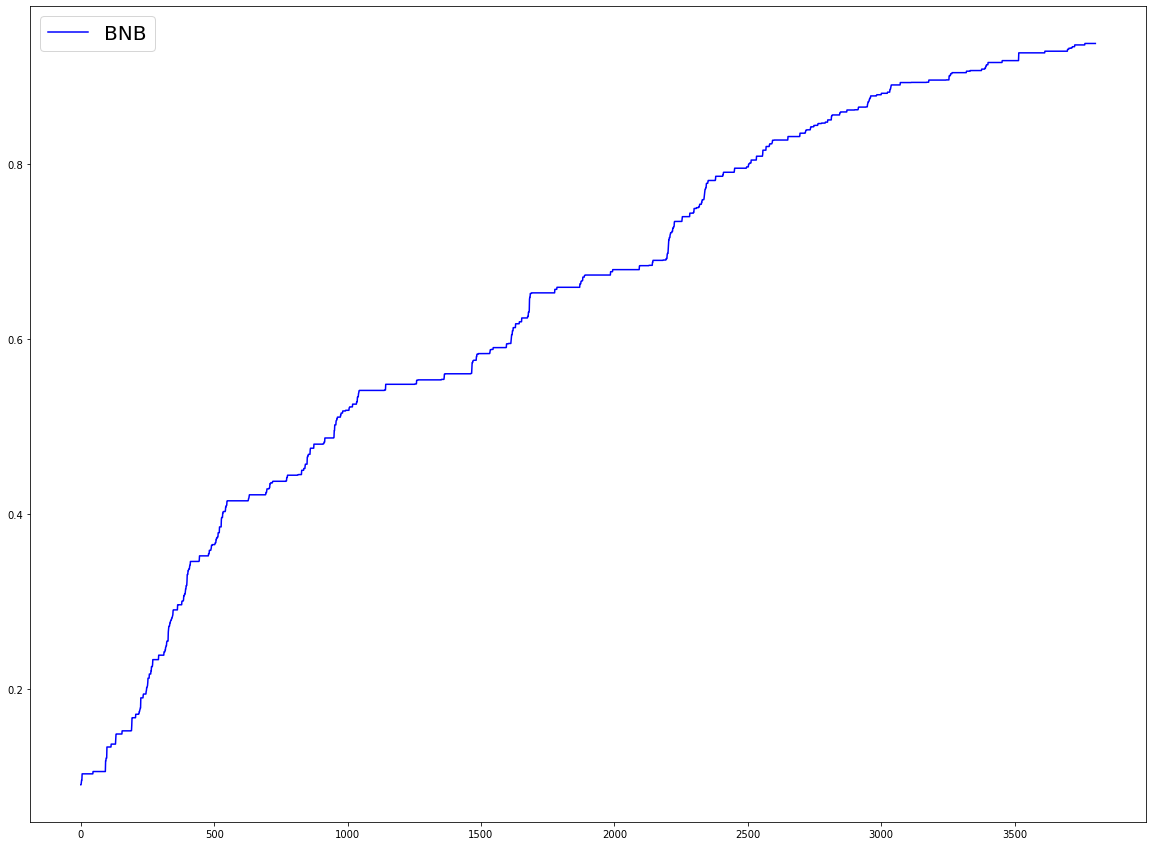

In [20]:
plt.figure(figsize = (20, 15))
plt.plot(sorted(prob_g), color = "blue", label = "BNB")
plt.legend(loc = 0, prop = {"size": 20})
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

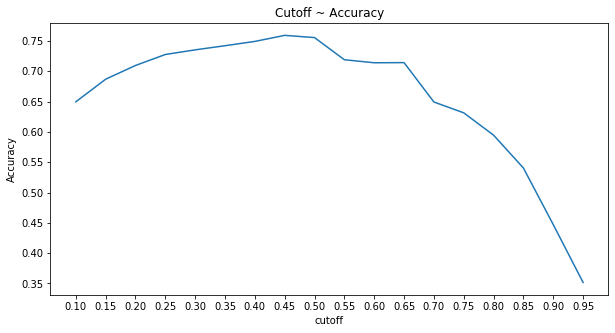

In [16]:
"""
ANSWER
"""

plt.figure(figsize = (10, 5))
plt.plot(cutoff, acc_Y)
plt.title("Cutoff ~ Accuracy")
plt.xlabel("cutoff")
plt.ylabel("Accuracy")
plt.xticks(cutoff)
plt.show

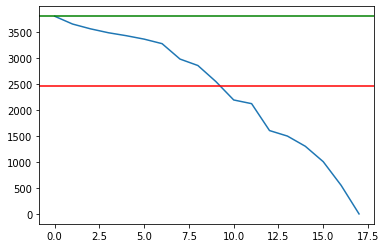

In [34]:
count_g_y = [[] for i in range(len(set_Y))]
for i in range(len(set_Y)):
    count_g_y[i] = set_Y[i].count('g')
plt.plot(count_g_y)
plt.axhline(y = len(testY), c = "green")
plt.axhline(y = list(testY).count('g'), c = "red")

## 2. Decision Tree
The aim of the given data set is to predict annual income of people based on the following factors.
-	age:  the age of an individual
-	capital-gain: capital gains for an individual
-	capital-loss: capital loss for an individual
-	hours-per-week: the hours an individual has reported to work per week
-	sex: 1 if male, 0 if female
-	native-country: 1 if USA, 0 if others
-	workclass_[#]: 1 if an individual belongs to workclass # otherwise 0 (eg. Workclass_Private is 1 if an individual works for private companies)
-	education_[#]: 1 if an individual’s education level is # otherwise 0(education level: Graduate > 4-year university > “<4-year university” > High school > “<High school” > Preschool)
-	marital-status_[#] 1 if an individual’s marital status is # otherwise 0 (Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces)
-	occupation_[#]: 1 if an individual’s occupation is # otherwise 0. 
-	race_[#]: 1 if an individual’s race is #, otherwise 0

Target is ‘income’ (“>50K” or “<=50K”)

fnlwgt represents the number of people the census believes the entry represents, which is not used in training. 


In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline
income=pd.read_csv('https://drive.google.com/uc?export=download&id=13HzPLzSDfSwOhvpYOrRSWPMoXzGwYQPx')

(1) Train a decision tree with the setting that max_depth=3, min_samples_split=100, min_samples_leaf=50 using entropy. Then, calculate overall accuracy, accuracy of class ">50K", and accuracy of class "<=50K".

In [18]:
X = income.drop(['fnlwgt', 'income'], axis = 1).values
y = income['income'].values
print(X)
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split=100, min_samples_leaf=50, criterion = 'entropy').fit(X, y)
pred_y = dt.predict(X)
accu = accuracy_score(pred_y, y)
accu_dt = dt.score(X, y)
print(accu)
print(accu_dt)

[[   39     1  2174 ...     0     0     1]
 [   50     1     0 ...     0     0     1]
 [   38     1     0 ...     0     0     1]
 ...
 [   58     0     0 ...     0     0     1]
 [   22     1     0 ...     0     0     1]
 [   52     0 15024 ...     0     0     1]]
0.7975454131128329
0.7975454131128329


In [19]:
import numpy as np
part_len = [list(y).count('>50K'), list(y).count('<=50K')]
part_line = [[], []]
for i in range(len(y)):
    if y[i] == '>50K':
        part_line[0].append(i)
    else:
        part_line[1].append(i)

# P(y table predicted by ">50K" | y = ">")
for i in range(2):
    part_X = X.copy()
    part_X = np.delete(part_X, part_line[i], axis = 0)
    part_y = y.copy()
    part_y = np.delete(part_y, part_line[i], axis = 0)
    part_pred_y = dt.predict(part_X)
    part_accu = accuracy_score(part_pred_y, part_y)
    print(part_accu)

0.9990896479972255
0.18980392156862744


(3) Draw the trained tree

In [20]:
a = list(income.columns)
a.remove('income')
a.remove('fnlwgt')
index = a

[Text(1395.0, 1585.5, 'marital-status_Married-civ-spouse <= 0.5\nentropy = 0.81\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(697.5, 1132.5, 'capital-gain <= 7073.5\nentropy = 0.362\nsamples = 16379\nvalue = [15250, 1129]\nclass = <=50K'),
 Text(348.75, 679.5, 'age <= 27.5\nentropy = 0.295\nsamples = 16079\nvalue = [15241, 838]\nclass = <=50K'),
 Text(174.375, 226.5, 'entropy = 0.06\nsamples = 6155\nvalue = [6112, 43]\nclass = <=50K'),
 Text(523.125, 226.5, 'entropy = 0.403\nsamples = 9924\nvalue = [9129, 795]\nclass = <=50K'),
 Text(1046.25, 679.5, 'education_High school <= 0.5\nentropy = 0.194\nsamples = 300\nvalue = [9, 291]\nclass = >50K'),
 Text(871.875, 226.5, 'entropy = 0.094\nsamples = 248\nvalue = [3, 245]\nclass = >50K'),
 Text(1220.625, 226.5, 'entropy = 0.516\nsamples = 52\nvalue = [6, 46]\nclass = >50K'),
 Text(2092.5, 1132.5, 'capital-gain <= 5095.5\nentropy = 0.994\nsamples = 14339\nvalue = [7818, 6521]\nclass = <=50K'),
 Text(1743.75, 679.5, 'education

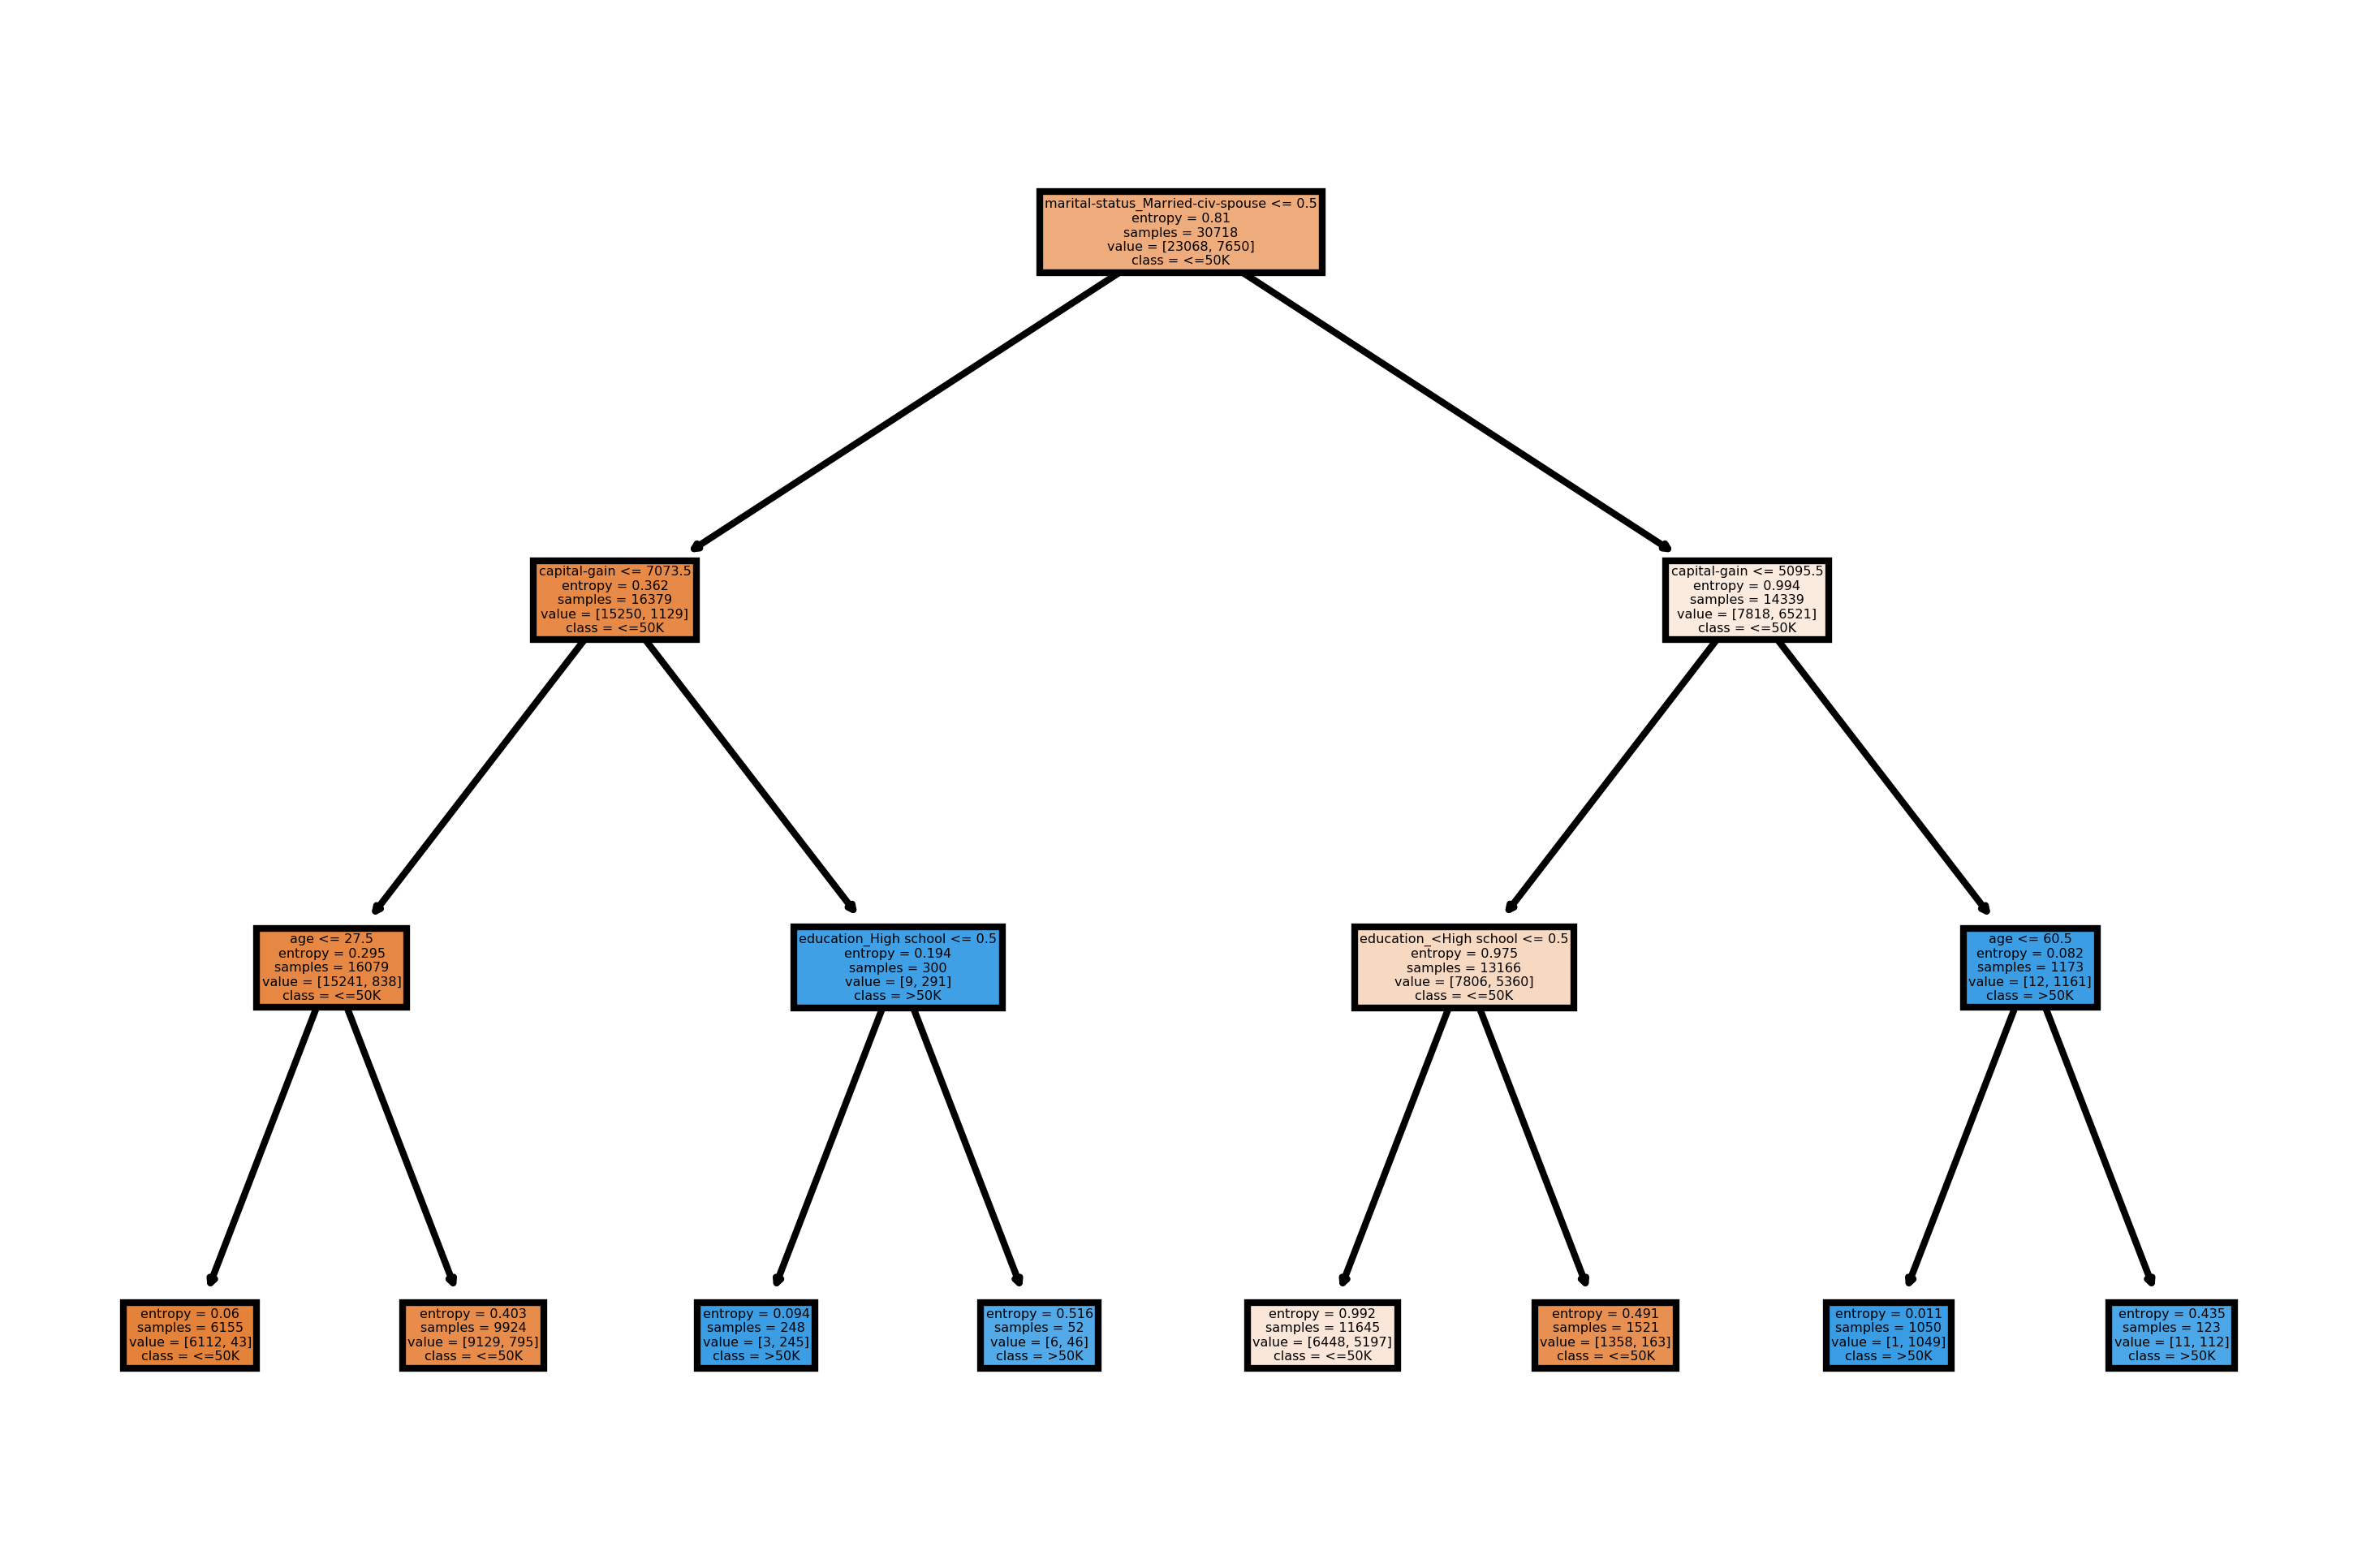

In [21]:
figr = plt.figure(dpi = 600)

tree.plot_tree(dt, feature_names = index, class_names = ["<=50K", ">50K"], filled = True)


In [22]:
# (5)
accu_age = 0
count = 0
total = 0
for i in range(len(income)):
    if income['age'][i] <= 60.5:
        total += 1
        if income['income'][i] == "<=50K":
            count += 1
accu_age = count / total
print(accu_age)

0.7511340420374667


(6) Train a new tree by changing a metric for finding split rules from entropy to gini impurity and compare two models in terms of the performance of the models and the generated rules

In [23]:
X = income.drop(['fnlwgt', 'income'], axis = 1).values
y = income['income'].values
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split=100, min_samples_leaf=50, criterion = 'gini').fit(X, y)
pred_y = dt.predict(X)
accu = accuracy_score(pred_y, y)
accu_dt = dt.score(X, y)
print(accu)
print(accu_dt)

0.8147991405690475
0.8147991405690475


In [24]:
import numpy as np
part_len = [list(y).count('>50K'), list(y).count('<=50K')]
part_line = [[], []]
for i in range(len(y)):
    if y[i] == '>50K':
        part_line[0].append(i)
    else:
        part_line[1].append(i)

# P(y table predicted by ">50K" | y = ">")
for i in range(2):
    part_X = X.copy()
    part_X = np.delete(part_X, part_line[i], axis = 0)
    part_y = y.copy()
    part_y = np.delete(part_y, part_line[i], axis = 0)
    part_pred_y = dt.predict(part_X)
    part_accu = accuracy_score(part_pred_y, part_y)
    print(part_accu)

0.9943644876018727
0.2733333333333333


In [25]:
index = list(income.columns)
index.remove('income')
index.remove('fnlwgt')

[Text(1395.0, 1585.5, 'marital-status_Married-civ-spouse <= 0.5\ngini = 0.374\nsamples = 30718\nvalue = [23068, 7650]\nclass = <=50K'),
 Text(697.5, 1132.5, 'capital-gain <= 7073.5\ngini = 0.128\nsamples = 16379\nvalue = [15250, 1129]\nclass = <=50K'),
 Text(348.75, 679.5, 'hours-per-week <= 43.5\ngini = 0.099\nsamples = 16079\nvalue = [15241, 838]\nclass = <=50K'),
 Text(174.375, 226.5, 'gini = 0.056\nsamples = 12755\nvalue = [12384, 371]\nclass = <=50K'),
 Text(523.125, 226.5, 'gini = 0.242\nsamples = 3324\nvalue = [2857, 467]\nclass = <=50K'),
 Text(1046.25, 679.5, 'education_High school <= 0.5\ngini = 0.058\nsamples = 300\nvalue = [9, 291]\nclass = >50K'),
 Text(871.875, 226.5, 'gini = 0.024\nsamples = 248\nvalue = [3, 245]\nclass = >50K'),
 Text(1220.625, 226.5, 'gini = 0.204\nsamples = 52\nvalue = [6, 46]\nclass = >50K'),
 Text(2092.5, 1132.5, 'capital-gain <= 5095.5\ngini = 0.496\nsamples = 14339\nvalue = [7818, 6521]\nclass = <=50K'),
 Text(1743.75, 679.5, 'capital-loss <= 1782

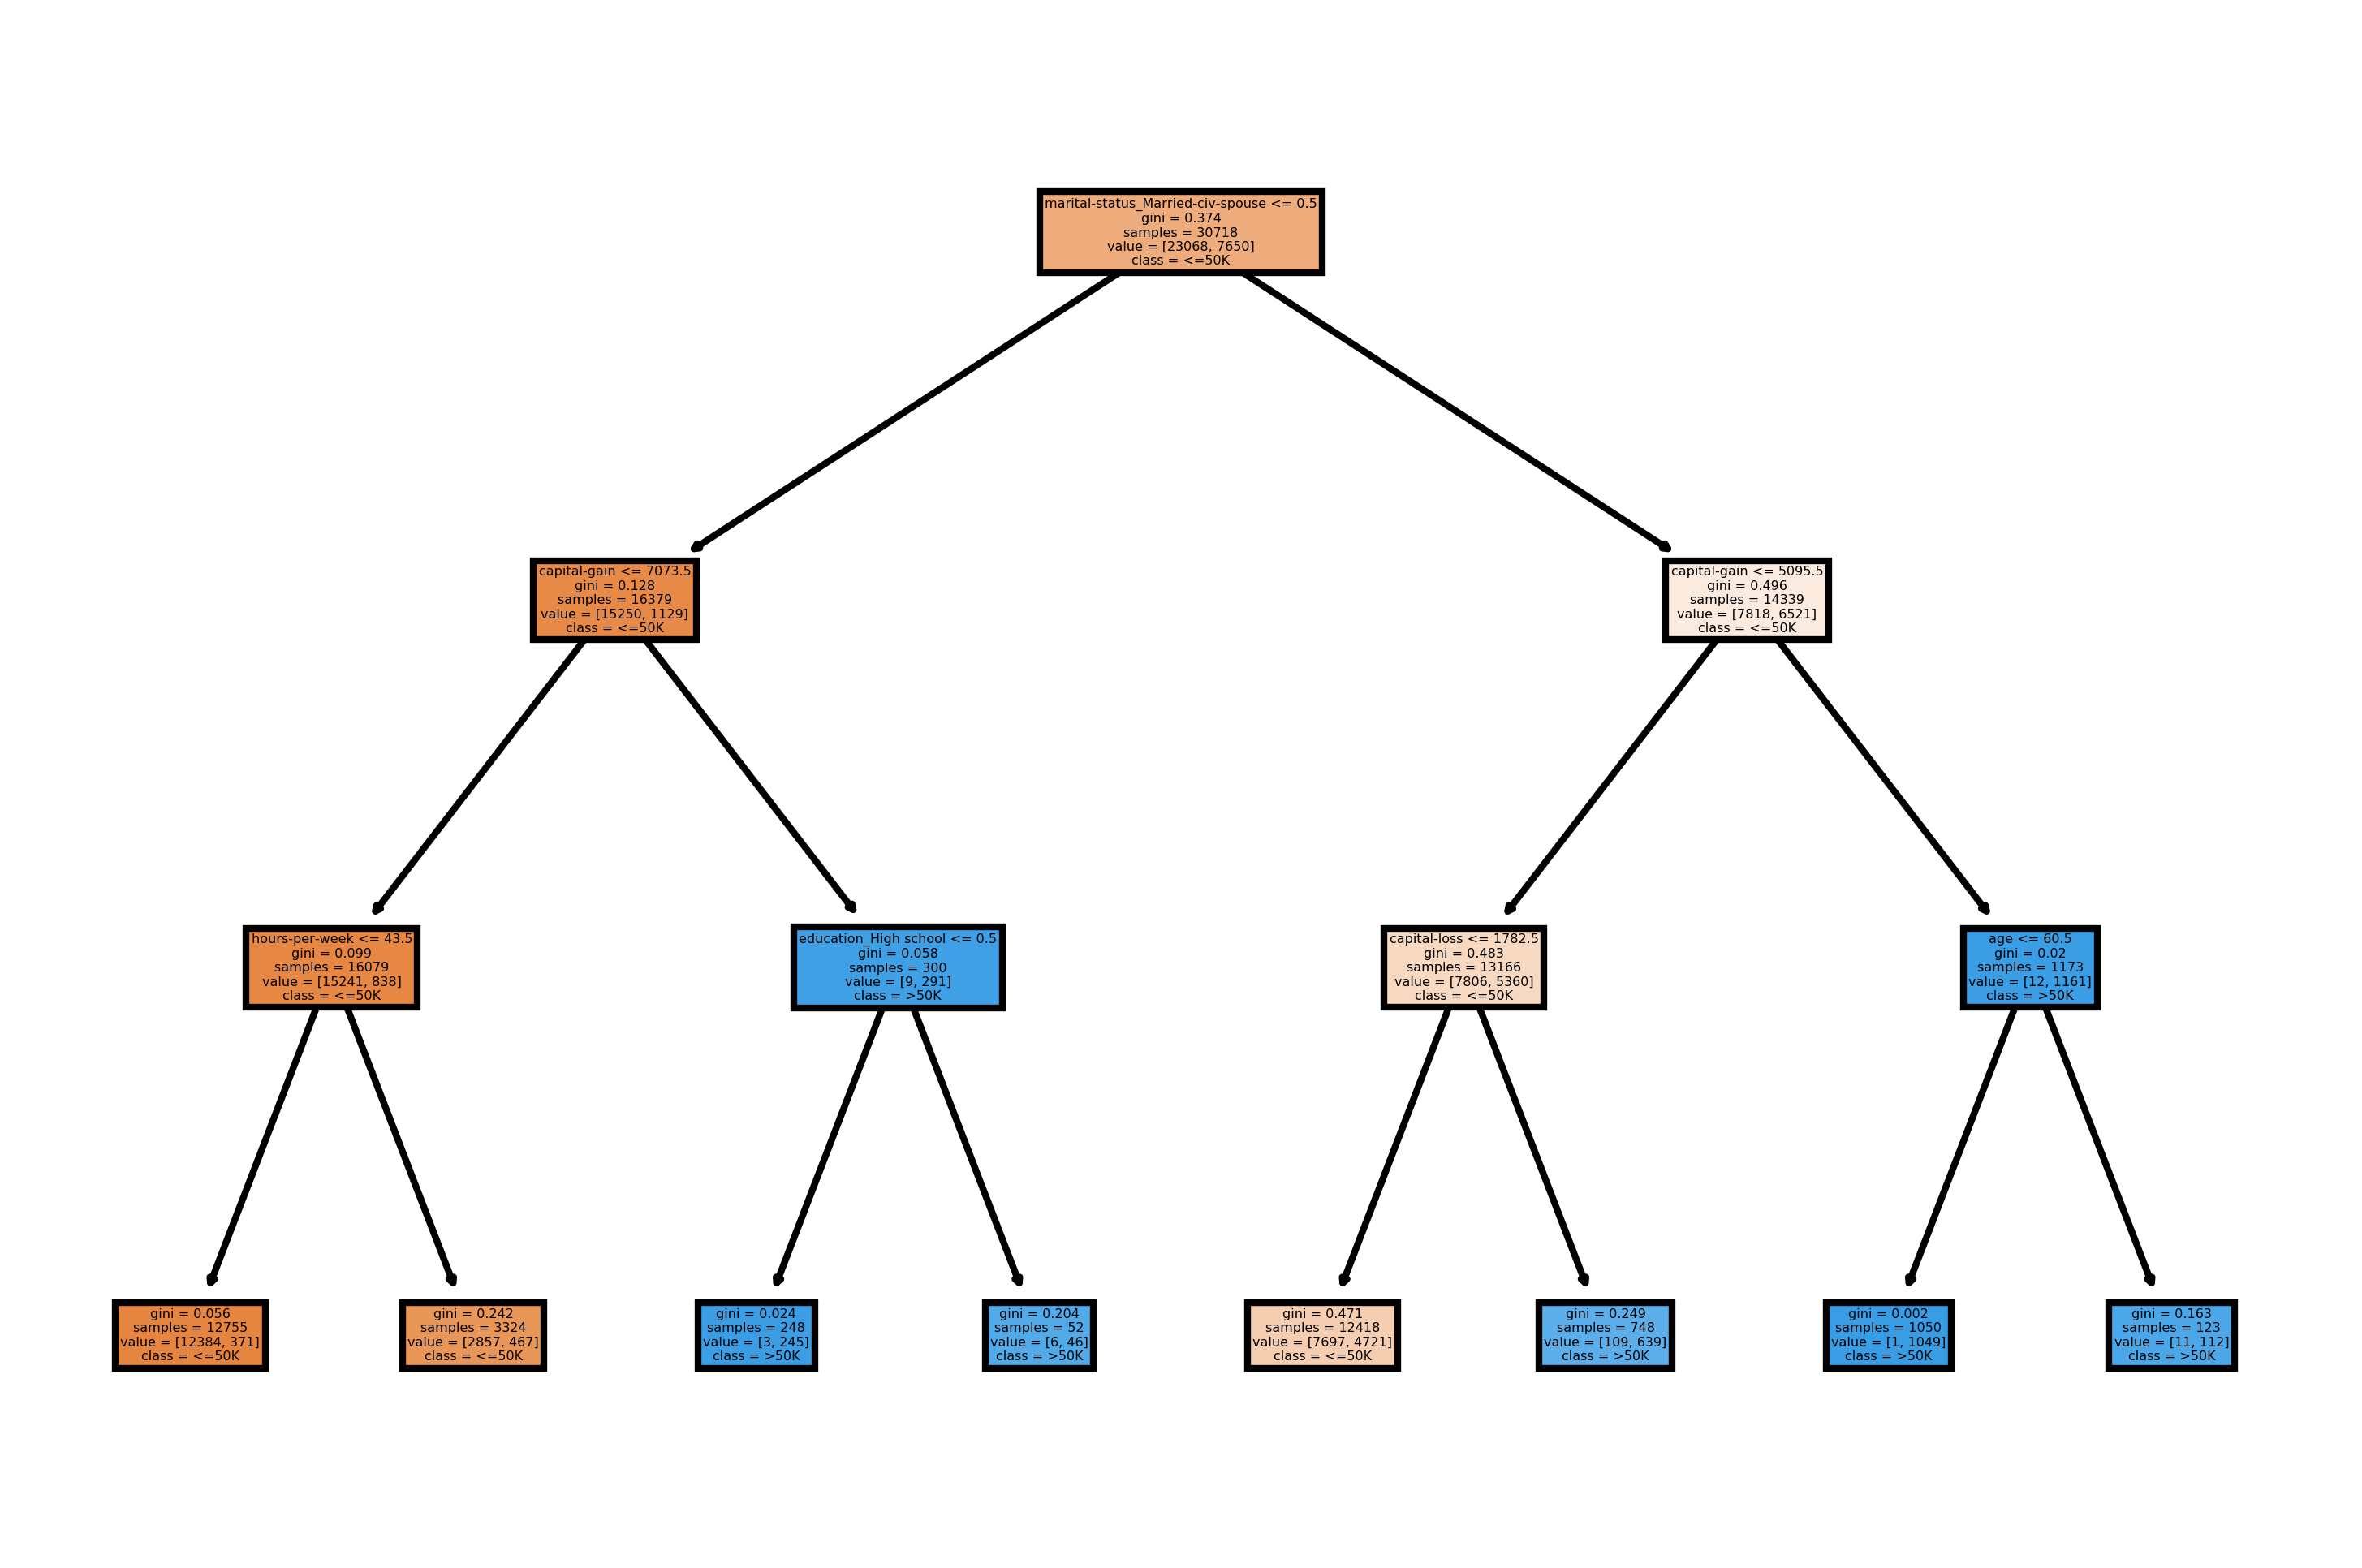

In [26]:
figr = plt.figure(dpi = 600)

tree.plot_tree(dt, feature_names = index, class_names = ["<=50K", ">50K"], filled = True)

## 3 $k$-means clustering
This problem uses the data generated from 4 normal distributions for applying $k$-means clustering. 
k-means implemented in sci-kit learn can assign initial centeroids through ‘init’. When init is set as $c$ by $p$ array ($c$ = the number of clusters, $p$ = the number of features), each row is used as a centroid.


In [31]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from numpy import random

X,y=datasets.make_blobs(n_samples=500, n_features=2, cluster_std=1, random_state=68, centers=4)

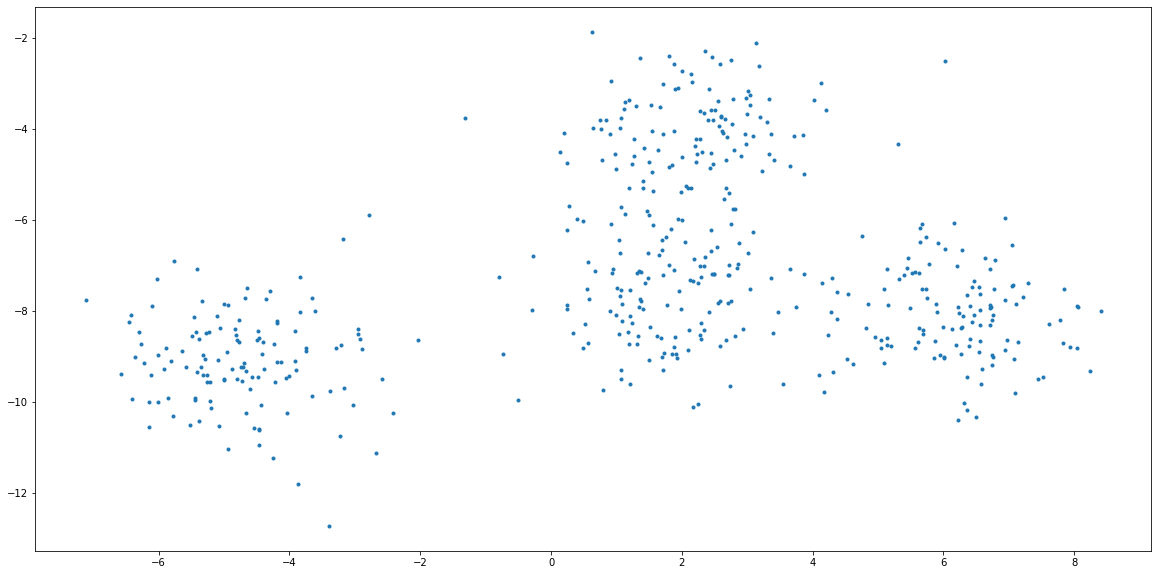

In [32]:
plt.figure(figsize = (20, 10))
plt.plot(X[:, 0], X[:, 1], '.')

In [33]:
count = [0, 0, 0, 0]
for i in y:
    for j in range(4):
        if i == j:
            count[j] += 1
print(count)

[125, 125, 125, 125]


(1) Select randomly 4 samples from the given data set and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iteration. 

In [44]:
sil = 0 # varable for calculating avarage value of the silhouette coefficient
ari = 0 # varable for calculating avarage adjusted rand index values for 100 iteration.

# Variables for 3-(3)
worst_centroid_km_1 = np.zeros((4, 2)) # Initial centroids that cause the worst case based on Silhouette
worst_centroid_km_1_ari = np.zeros((4, 2)) # Initial centroids that cause the worst case based on ARI

sil_comp = 1
ari_comp = 1

# Repeat 100 times
for i in range(100):
    # 4 randomly choosen numbers from 0 to 499
    sample = random.choice(500, 4, replace = False)
    
    # Initializing cenrtoids
    centroid = np.zeros((4, 2))
    for j in range(len(sample)):
        centroid[j] = list(X[sample[j]])
    
    # Assigning k-means clustering with given centroids
    km_1 = KMeans(n_clusters= 4, init= centroid, n_init= 1, max_iter = 100).fit(X)
    pred_km_1 = km_1.fit_predict(X) # Extract predicted label: y
    
    sil += silhouette_score(X, pred_km_1)
    ari += adjusted_rand_score(y, pred_km_1)
    # Section for Question 3 - (3)
    if silhouette_score(X, pred_km_1) < sil_comp:
        sil_comp = silhouette_score(X, pred_km_1)
        worst_centroid_km_1 = centroid.copy()
        
    if adjusted_rand_score(y, pred_km_1) < ari_comp:
        ari_comp = adjusted_rand_score(y, pred_km_1)
        worst_centroid_km_1_ari = centroid.copy()

sil /= 100
ari /= 100

print(sil)
print(ari)
print(sil_comp)
print(ari_comp)

0.5596309236274112
0.855540883808461
0.43599260164309206
0.24052498255322907


(2) Select randomly one sample from each normal distribution and use them as initial centroids. This procedure is repeated for 100 times. Then, calculate the average values of the silhouette coefficient and adjusted rand index values for 100 iteration. 

In [36]:
# List for containing each normal distribution's variables
dist_container = [[], [], [], []]
for i in range(len(y)):
    for j in range(4):
        if y[i] == j:
            dist_container[j].append(list(X[i]))

In [39]:
sil = 0 # varable for calculating avarage value of the silhouette coefficient
ari = 0 # varable for calculating avarage adjusted rand index values for 100 iteration.

# Variables for 3-(4)
worst_centroid_km_2 = np.zeros((4, 2)) # centroids that cause the worst case
worst_centroid_km_2_ari = np.zeros((4, 2)) # Initial centroids that cause the worst case based on ARI

sil_comp = 1
ari_comp = 1

# Repeat 100 times
for i in range(100):
    # 4 randomly choosen numbers from 0 to 124
    sample = random.choice(125, 4, replace = False)
    
    # Initializing cenrtoids
    centroid = np.zeros((4, 2))
    for j in range(len(sample)):
        centroid[j] = dist_container[j][sample[j]]
        
    # Assigning k-means clustering with given centroids
    km_2 = KMeans(n_clusters= 4, init= centroid, n_init= 1, max_iter = 100).fit(X)
    pred_km_2 = km_2.fit_predict(X) # Extract predicted label: y
    
    sil += silhouette_score(X, pred_km_2)
    ari += adjusted_rand_score(y, pred_km_2)
    
    # Section for Question 3 - (4)
    if silhouette_score(X, pred_km_2) < sil_comp:
        sil_comp = silhouette_score(X, pred_km_2)
        worst_centroid_km_2 = centroid.copy()
        
    if adjusted_rand_score(y, pred_km_1) < ari_comp:
        ari_comp = adjusted_rand_score(y, pred_km_1)
        worst_centroid_km_2_ari = centroid.copy()

sil /= 100
ari /= 100

print(sil)
print(ari)
print(sil_comp)
print(ari_comp)

0.5928633148378466
0.9401997263000598
0.5927788396410998
0.9422715725985782


(3) Draw a scatter plot for the given data with initial centroids and final centroids for the worst case among 100 trials in Question 3-(1). The initial centroids should be marked as red ‘X’ and the final centroids should be marked as blue ‘X’. 

In [19]:
# Usually, high silhouette score and high adjusted rand index regarded as good case

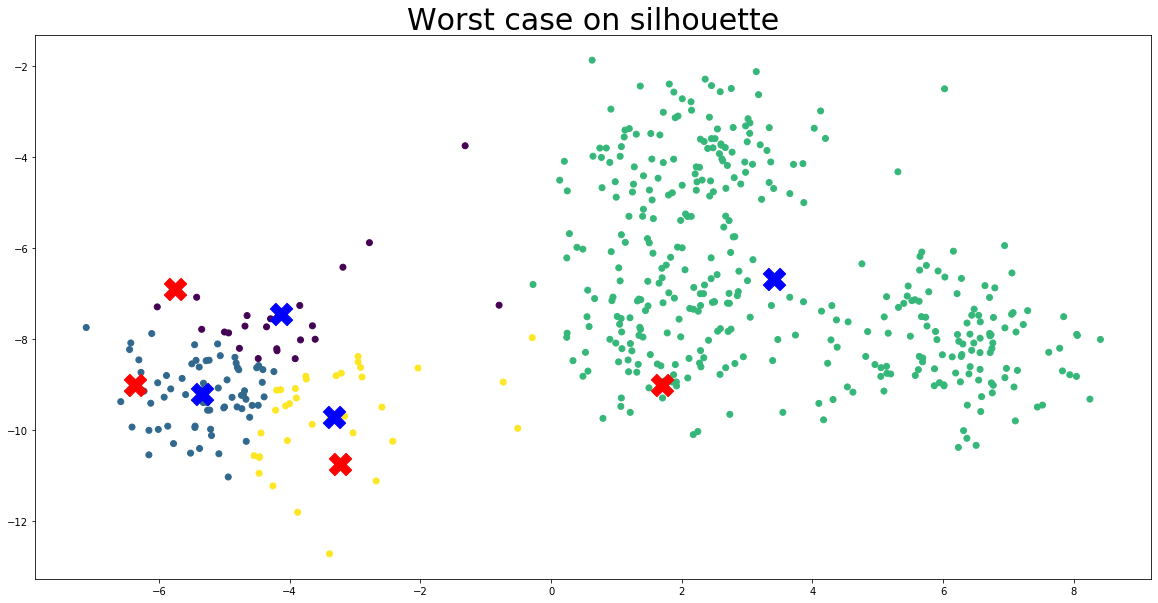

In [45]:
# Based on silhouette coefficient

# Assigning k-means clustering with centroids that cause the worst case based on silhouette: worst_centroid_km_1
km_1 = KMeans(n_clusters= 4, init= worst_centroid_km_1, n_init= 1).fit(X)
pred_km_1 = km_1.fit_predict(X) # Extract predicted label: y

coor_x = X[:, 0]
coor_y = X[:, 1]

plt.figure(figsize= (20, 10))
plt.scatter(coor_x, coor_y, c = pred_km_1)
for i in range(len(worst_centroid_km_1)):
    plt.scatter(worst_centroid_km_1[i, 0], worst_centroid_km_1[i, 1], c = "r", marker= 'X', s= 500)
    plt.scatter(km_1.cluster_centers_[i][0], km_1.cluster_centers_[i][1], c = "b", marker = "X", s = 500)
plt.title('Worst case on silhouette', fontsize = 30)
plt.show()

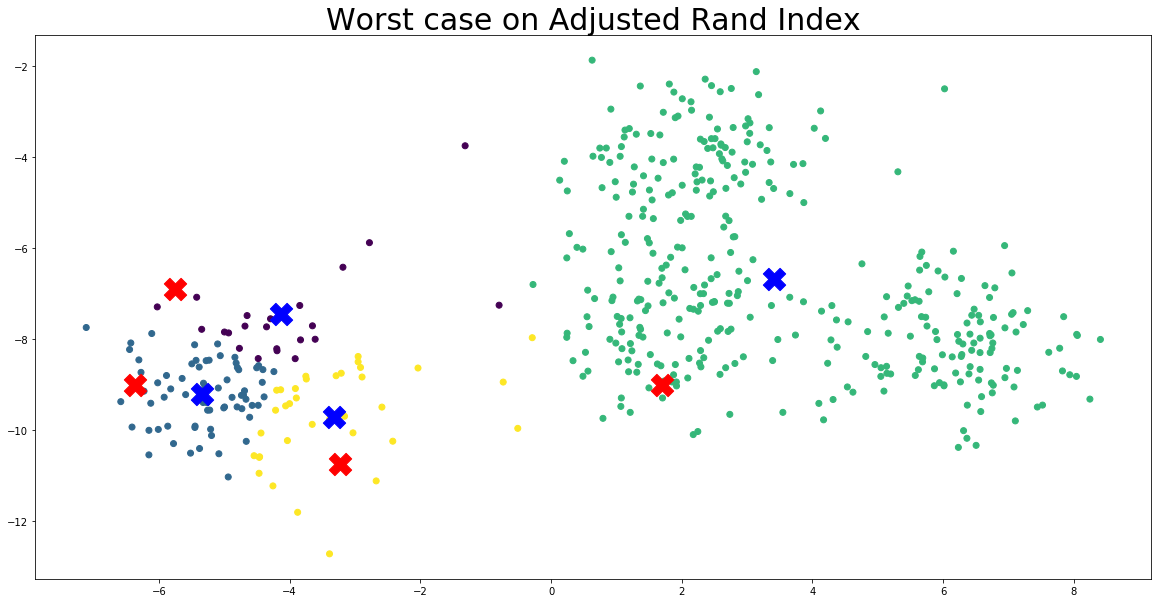

In [46]:
# Based on Adjusted Rand Index

# Assigning k-means clustering with centroids that cause the worst case based on Adjusted Rand Index: worst_centroid_km_1_ari
km_1 = KMeans(n_clusters= 4, init= worst_centroid_km_1_ari, n_init= 1).fit(X)
pred_km_1 = km_1.fit_predict(X) # Extract predicted label: y


coor_x = X[:, 0]
coor_y = X[:, 1]

plt.figure(figsize= (20, 10))
plt.scatter(coor_x, coor_y, c = pred_km_1)
for i in range(len(worst_centroid_km_1)):
    plt.scatter(worst_centroid_km_1_ari[i, 0], worst_centroid_km_1_ari[i, 1], c = "r", marker= 'X', s= 500)
    plt.scatter(km_1.cluster_centers_[i][0], km_1.cluster_centers_[i][1], c = "b", marker = "X", s = 500)
plt.title('Worst case on Adjusted Rand Index', fontsize = 30)
plt.show()

(4) Draw a scatter plot for the worst case of Question 3-(2) in the same way as in Question 3-(3).  

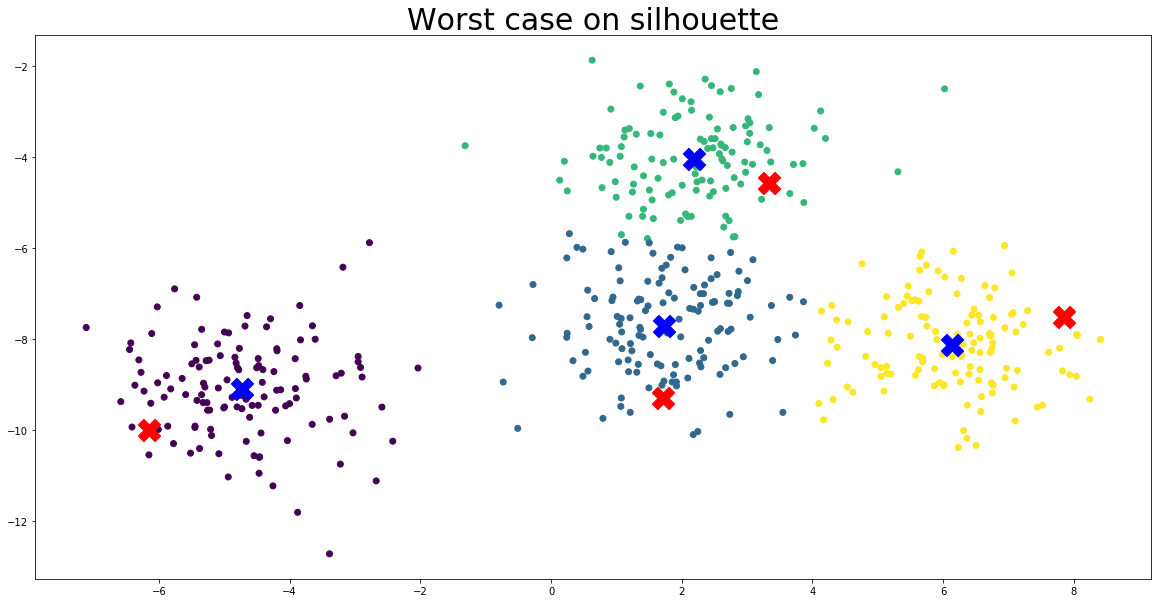

In [42]:
# Based on silhouette coefficient

# Assigning k-means clustering with centroids that cause the worst case based on silhouette: worst_centroid_km_1
km_2 = KMeans(n_clusters= 4, init= worst_centroid_km_2, n_init= 1).fit(X)
pred_km_2 = km_2.fit_predict(X) # Extract predicted label: y

coor_x = X[:, 0]
coor_y = X[:, 1]

plt.figure(figsize= (20, 10))
plt.scatter(coor_x, coor_y, c = pred_km_2)
for i in range(len(worst_centroid_km_1)):
    plt.scatter(worst_centroid_km_2[i, 0], worst_centroid_km_2[i, 1], c = "r", marker= 'X', s= 500)
    plt.scatter(km_2.cluster_centers_[i][0], km_2.cluster_centers_[i][1], c = "b", marker = "X", s = 500)
plt.title('Worst case on silhouette', fontsize = 30)
plt.show()

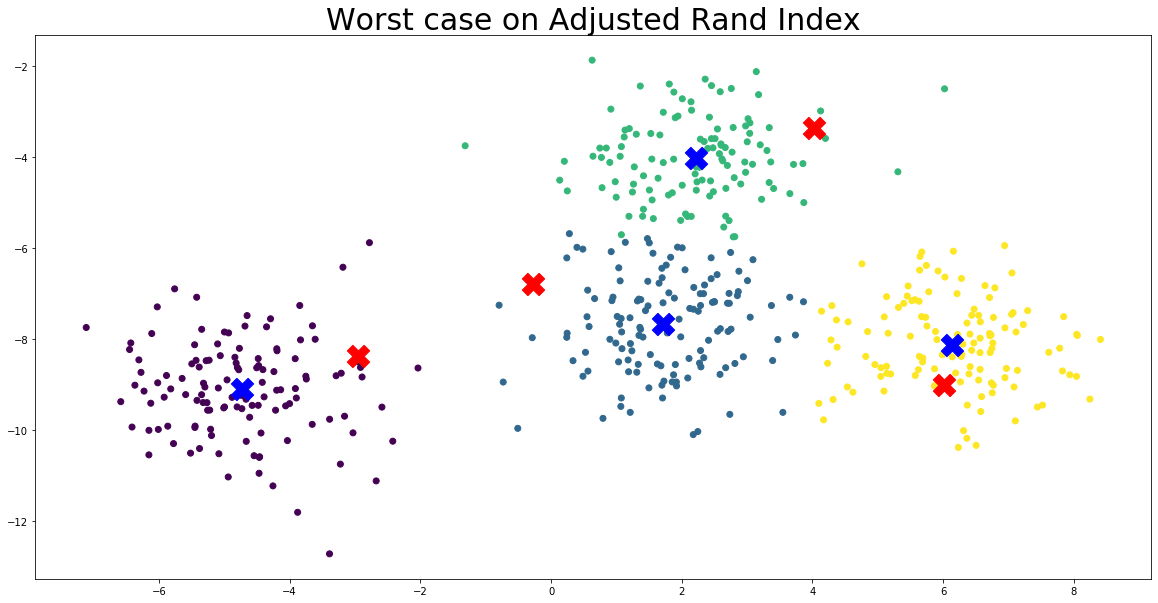

In [43]:
# Based on Adjusted Rand Index

# Assigning k-means clustering with centroids that cause the worst case based on Adjusted Rand Index: worst_centroid_km_1_ari
km_2 = KMeans(n_clusters= 4, init= worst_centroid_km_2_ari, n_init= 1).fit(X)
pred_km_2 = km_2.fit_predict(X) # Extract predicted label: y


coor_x = X[:, 0]
coor_y = X[:, 1]

plt.figure(figsize= (20, 10))
plt.scatter(coor_x, coor_y, c = pred_km_2)
for i in range(len(worst_centroid_km_2)):
    plt.scatter(worst_centroid_km_2_ari[i, 0], worst_centroid_km_2_ari[i, 1], c = "r", marker= 'X', s= 500)
    plt.scatter(km_2.cluster_centers_[i][0], km_2.cluster_centers_[i][1], c = "b", marker = "X", s = 500)
plt.title('Worst case on Adjusted Rand Index', fontsize = 30)
plt.show()